# Imports

In [35]:
import pandas as pd, numpy as np, statsmodels.api as sm 
import seaborn as sns, matplotlib.pyplot as plt
import scipy.stats as spst
from scipy.stats import norm
#style of graphics
plt.style.use('Solarize_Light2')


# Plotting Sample Sizes, Binomial CI

Given a few assumptions, we get to:

&nbsp;

When we consider the maximum variance in something binomial, sample size is:

$$ n_{max_{\sigma^2}}\frac{CDF_{Z}^2}{W^2} $$

In which W is the margin of error in percent points that we expect of a confidence interval, and $CDF_{Z}$ comes from a level of confidence we can get from different values of a Z score.




## Obtaining $CDF_{Z}$

In [67]:
norm.ppf(0.98, loc=0, scale=1)

2.0537489106318225

Given a Z score as "sigma" (units away from the mean), we find the value of the CDF of a standard normal given that sigma, and plug that in to our sample size expressions.

sigma = -2 -> 2.275 %
sigma = -1 -> 15.866 %
sigma = 1 -> 84.134 %
sigma = 1.96 -> 97.5 %
sigma = 2 -> 97.725 %
sigma = 3 -> 99.865 %
sigma = 4 -> 99.997 %


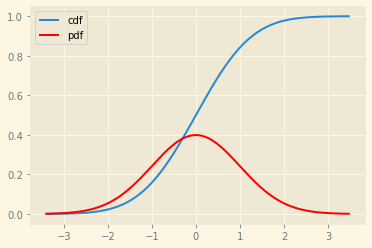

In [68]:
#CDF_Z -> Which percentage of the standard normal distribution have we gotten 
#at Z standard deviations? (positive or negative)
fig, ax = plt.subplots(1, 1)
x=norm.rvs(size=3000)
sns.lineplot(x=x,y=norm.cdf(x),ax=ax,label='cdf')
sns.lineplot(x=x,y=norm.pdf(x),color='r',ax=ax, label='pdf')
for sigmaz in (-2,-1,1,1.96,2,3,4):
    confidence=round(100*spst.norm.cdf(sigmaz),3)
    print('sigma =',sigmaz,'->',confidence,'%')
    
ax.grid(b=True)

## Back to plotting sample size given binomial CI...

In [58]:
#for max binomial variance= 0.25
n_sz_max_variance=lambda Z,W: norm.cdf(Z)**2/W**2

In [107]:
W=np.arange(0.01,0.1,0.01) #margin of error: 1% to 10%
sigmas={1:'#52006A',1.96:'#FFA900',2:'#CD113B',3:'#FF7600'} #sigmas and colors

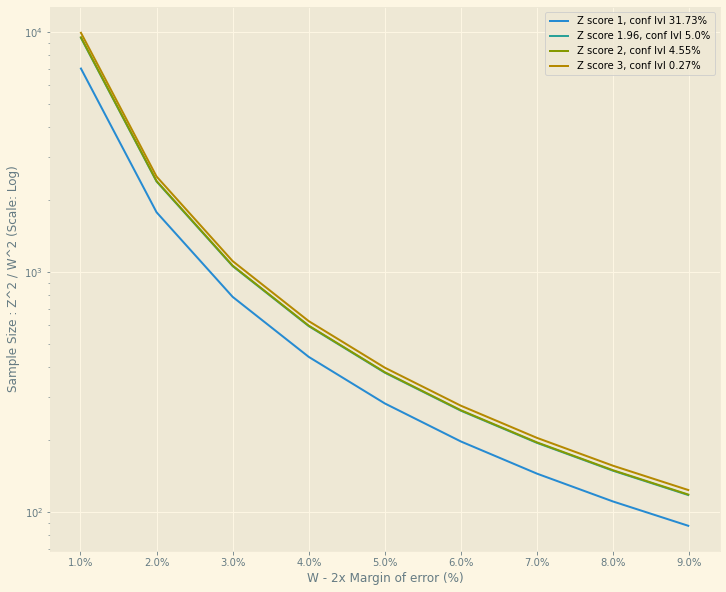

In [122]:
fig, ax = plt.subplots(1, 1,figsize=(12,10))
for Z in sigmas: #gets keys
    sample_sizes=n_sz_max_variance([Z]*len(W),W)
    sns.lineplot(x=W,y=sample_sizes,ax=ax,
        label=f'Z score {Z}, conf lvl {round(100*(1-norm.cdf(Z))*2,2)}%')
_=plt.yscale('log')
_=ax.grid(b=True)
_=ax.set_xticks(W)
_=ax.set_xticklabels([f'{round(w*100,1)}%' for w in W])
_=ax.set_xlabel('W - 2x Margin of error (%)')
_=ax.set_ylabel('Sample Size : Z^2 / W^2 (Scale: Log)')
plt.savefig('sample_size_proportions',dpi=100,format='svg')

<Figure size 432x288 with 0 Axes>